In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-sentiment-analysis/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/financial-sentiment-analysis/data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
df.shape

(5842, 2)

In [4]:
df.Sentiment.value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [5]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

6

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.shape

(5836, 2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distrobution of the sentiment by Count')

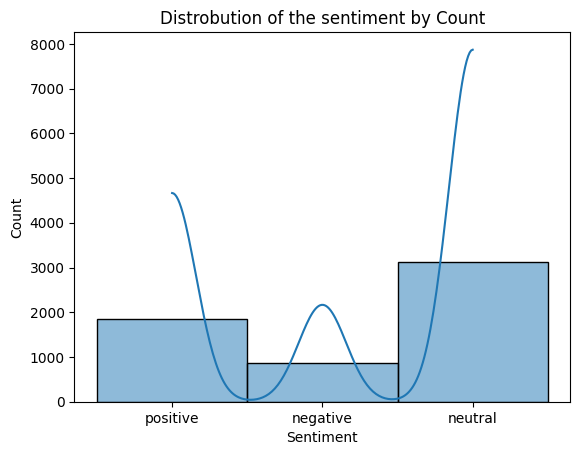

In [9]:
sns.histplot(df.Sentiment,kde=True)
plt.title("Distrobution of the sentiment by Count")

In [10]:
def getlength(text):
    return len(text)

In [11]:
df['text_len'] = df['Sentence'].apply(getlength)
df

,Sentence,Sentiment,text_len
0,The GeoSolutions technology will leverage Bene...,positive,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55
2,"For the last quarter of 2010 , Componenta 's n...",positive,193
3,According to the Finnish-Russian Chamber of Co...,neutral,128
4,The Swedish buyout firm has sold its remaining...,neutral,135
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107
5838,Nordic Walking was first used as a summer trai...,neutral,83
5839,"According shipping company Viking Line , the E...",neutral,99
5840,"In the building and home improvement trade , s...",neutral,88


Text(0.5, 1.0, 'distribution of text length by Sentiment')

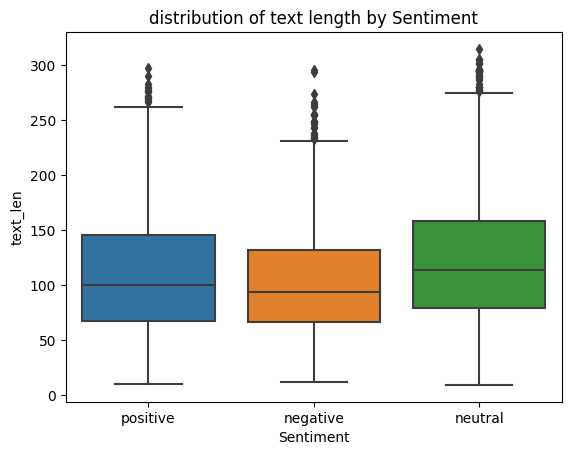

In [12]:
sns.boxplot(x=df['Sentiment'],y=df['text_len'])
plt.title(f"distribution of text length by Sentiment")

We notice that there isn't much difference between the length of the sentence and the sentiment that it portrays, it could have been helpful for neutral sentiment sentences but we cannot use the length of the sentence and we will only use the sentence itself

In [13]:
df = df.drop('text_len',axis=1)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [93]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

def preprocess_word2vec(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    return [stemmer.stem(token) for token in tokens]


In [16]:
from nltk.corpus import wordnet
df['preprocessed_text'] = df['Sentence'].apply(preprocess_text)
df

,Sentence,Sentiment,preprocessed_text
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl period ...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord chamber commerc major construct compani...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake ...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rise cost forc packag produc huhtamaki axe job...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walk first use summer train method skier
5839,"According shipping company Viking Line , the E...",neutral,accord ship compani vike line eu decis signifi...
5840,"In the building and home improvement trade , s...",neutral,build home improv trade sale decreas eur mn


In [17]:
X = df['preprocessed_text']
y = df['Sentiment']

In [172]:
from gensim.models import Word2Vec
tokenized_sentences = df['Sentence'].apply(preprocess_word2vec)

In [176]:
word2vec_model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [182]:
X_w2v = []
for sentence in tokenized_sentences:
    vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if vectors:
        X_w2v.append(np.mean(vectors, axis=0))
    else:
        # If no words from the sentence are in the vocabulary, add a zero vector
        X_w2v.append(np.zeros(word2vec_model.vector_size))

X_w2v = np.array(X_w2v)

In [183]:
X_w2v.shape

(5836, 100)

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [19]:
y_encoded

array([2, 0, 2, ..., 1, 1, 2])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [21]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [23]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.34      0.35      0.34       159
           1       0.77      0.78      0.78       666
           2       0.67      0.65      0.66       343

    accuracy                           0.68      1168
   macro avg       0.60      0.59      0.59      1168
weighted avg       0.68      0.68      0.68      1168



In [24]:
model2 = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [25]:
model2.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [26]:
# Make predictions on the test set
predictions2 = model2.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, predictions2)
print(f"Accuracy: {accuracy2:.2f}")

# Display classification report
print(classification_report(y_test, predictions2))

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.62      0.03      0.06       159
           1       0.70      0.95      0.81       666
           2       0.69      0.50      0.58       343

    accuracy                           0.70      1168
   macro avg       0.67      0.50      0.48      1168
weighted avg       0.69      0.70      0.64      1168



In [27]:
# !pip install 

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling1D,Embedding
from tensorflow.keras.utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier

In [29]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()
# Xnn = tfidf.fit_transform(X)
Xnn = cv.fit_transform(X).toarray()

In [30]:
Xnn.shape

(5836, 7142)

In [31]:
y_train_one_hot = to_categorical(y_encoded)

In [36]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(Xnn, y_train_one_hot, test_size=0.2, random_state=42)

In [193]:

model3 = Sequential([
    Dense(64, activation='relu'),
#     Dropout(0.5),
    Dense(32, activation='relu'),
#     Dropout(0.5),
    Dense(3, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
  model3 = Sequential([
    Embedding(Xnn.shape[1]+1, 100),
    GlobalAveragePooling1D(),
    Dense(300, activation='relu'),
    Dropout(0.2),
    Dense(150),
    Dense(3, activation='softmax')
                       ])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    

In [43]:
model3.fit(X_train_nn,y_train_nn, epochs=10, batch_size=32)

Epoch 1/10
146/146 [==============================] - 9s 59ms/step - loss: 0.9930 - accuracy: 0.5266
Epoch 2/10
146/146 [==============================] - 9s 59ms/step - loss: 0.9901 - accuracy: 0.5266
Epoch 3/10
146/146 [==============================] - 9s 60ms/step - loss: 0.9900 - accuracy: 0.5266
Epoch 4/10
146/146 [==============================] - 9s 60ms/step - loss: 0.9909 - accuracy: 0.5266
Epoch 5/10
146/146 [==============================] - 9s 60ms/step - loss: 0.9897 - accuracy: 0.5266
Epoch 6/10
143/146 [============================>.] - ETA: 0s - loss: 0.9905 - accuracy: 0.5264

KeyboardInterrupt: 

In [195]:
nnpredictions = model3.predict(X_test_nn)
nnpredictions

37/37 [==============================] - 0s 1ms/step


array([[0.2539939 , 0.3959923 , 0.35001373],
       [0.12802263, 0.56226486, 0.30971262],
       [0.1691055 , 0.5108369 , 0.32005745],
       ...,
       [0.21244837, 0.45486555, 0.3326862 ],
       [0.16430378, 0.5039162 , 0.33178005],
       [0.20711862, 0.4798188 , 0.31306258]], dtype=float32)

In [196]:
predicted_classes = np.argmax(nnpredictions, axis=1)

In [197]:
testacccuracy = accuracy_score(y_test,predicted_classes)
print(f'Test Accuracy: {testacccuracy:.2f}')
# Display classification report
print(classification_report(y_test, predicted_classes))

Test Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       159
           1       0.57      1.00      0.73       666
           2       0.33      0.00      0.01       343

    accuracy                           0.57      1168
   macro avg       0.30      0.33      0.24      1168
weighted avg       0.42      0.57      0.42      1168



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
